In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

def getdist(file):
    md = open(file,'r')
    md = md.readlines()
    dhh = []
    for i in range(len(md)):
        if 'MD' in md[i]:
            x1 = md[i+1].strip().split()[1]
            x2 = md[i+2].strip().split()[1]
            dhh.append(float(x2)-float(x1))
    return np.array(dhh)

Calculate the frecuency of vibration of H2 starting from a nuclear distance of 1 A (equilibrium distance is 0.68 A).

In [96]:
os.chdir('/home/fbonafe/dftb+/src/prg_dftb/test_md')
dhh_bomd = getdist('geo_end.xyz')
time_bo = np.linspace(0,8000,40001) * 0.024189

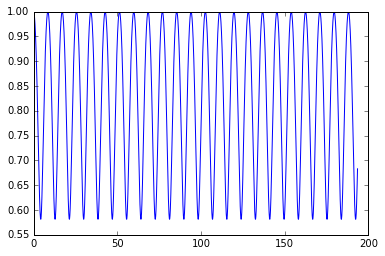

In [97]:
plt.plot(time_bo,dhh_bomd)

Calculate the frequency from time dependant propagation of both ions and electrons. In this case we have 'turned off' the contribution of the nucleii velocities in the update of the density matriz.

In [98]:
os.chdir('/home/fbonafe/dftb+/src/prg_dftb/test_dyn')
dhh_elec = getdist('tdcoords.xyz')
time_el = np.linspace(0,4000,80001) * 0.024189

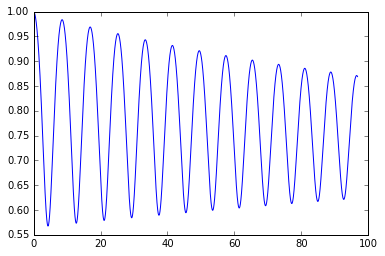

In [99]:
plt.plot(time_el,dhh_elec)

(0.0, 100.0)

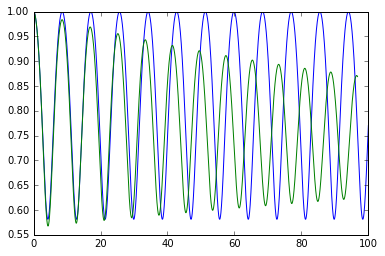

In [101]:
plt.plot(time_bo,dhh_bomd,time_el,dhh_elec)
plt.xlim(0.,100.)

In [152]:
from scipy.optimize import curve_fit

def osc(x,omega,amp,d0):
    return amp * np.cos(omega*x) + d0

def dampedosc(x,omega,amp,d0,damp):
    return amp * np.cos(omega*x) * np.exp(-x/damp) + d0

Fitting MD run with regular oscillator $$f(t) = A \sin(\omega)t$$

In [138]:
posc_opt, posc_cov = curve_fit(osc, time_bo, dhh_bomd, p0=[0.73, 0.2, 0.8])

In [129]:
omega_bo = posc_opt[0]
amp_bo = posc_opt[1]
#phase_bo = posc_opt[2]
d0_bo = posc_opt[2]
dhh_bo_fit = osc(time_bo,omega_bo,amp_bo,d0_bo)

[ 0.73482286  0.20589242  0.81658947]


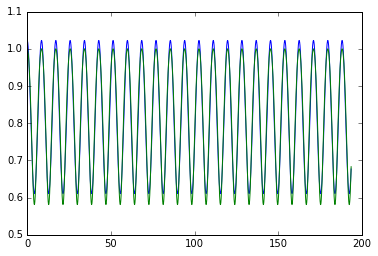

In [134]:
plt.plot(time_bo,dhh_bo_fit,time_bo,dhh_bomd)
print(posc_opt)

The best fit is achieved with $\omega = 0.7348 \mathrm{fs}^{-1}$

Fitting of the Ehrenfest run with damped oscilator $$f(t)=A\sin(\omega t)\exp(-t/t_d)$$

In [160]:
poscd_opt, poscd_cov = curve_fit(dampedosc, time_el, dhh_elec, p0=[0.85, 0.2, 0.816, 25.])

In [161]:
omega_el = poscd_opt[0]
amp_el = poscd_opt[1]
#phase_bo = posc_opt[2]
d0_el = poscd_opt[2]
damp_el = poscd_opt[3]
dhh_el_fit = dampedosc(time_el,omega_el,amp_el,d0_el,damp_el)

[   0.76893716    0.20566411    0.77889433  134.4344553 ]


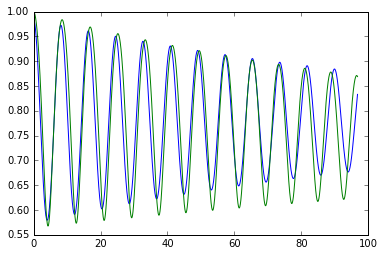

In [162]:
plt.plot(time_el,dhh_el_fit,time_el,dhh_elec)
print(poscd_opt)

The best fit is achieved with $\omega = 0.7689 \mathrm{fs}^{-1}$ and $t_d = 134.4344 fs$